<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jihidalgor/blob/main/A01794221_ActividadSemanal7_Regresion_y_Kmeans_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TC4029 - Ciencia y analítica de datos.**

**Actividad Semanal 7 - Regresión y Kmeans.**

***Notebook 1.***


Alumno: Jorge Iván Hidalgo Reyes.

*Matrícula: A01794221.*


Profesora: María de la Paz Rico Fernández.

Fecha: Noviembre 09, 2022.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# **Ejercicio 1. Costo en la industria de manufactura.**

Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

# Punto 1.

Divide los datos del costo de manufactura.

* Utiliza la función train_test_split (viene el ejemplo al final del notebook).


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(X_test.shape, ': dimensión de datos de entrada para prueba')  

print(y_train.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_test.shape, ': dimensión de variable de salida para prueba')

(800, 1) : dimensión de datos de entrada para entrenamiento y validación
(200, 1) : dimensión de datos de entrada para prueba
(800,) : dimensión de variable de salida para entrenamiento y validación
(200,) : dimensión de variable de salida para prueba


In [7]:
lista_MAE = []
lista_R2S = []
lista_Residuos = []

# Punto 2.

Regresión lineal.

* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [8]:
linear_reg = LinearRegression(fit_intercept = True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print("El valor de la pendiente es: ", linear_reg.coef_)
print("El valor de la ordenada al origen es: ", linear_reg.intercept_)

El valor de la pendiente es:  [-6.21850698]
El valor de la ordenada al origen es:  67.89012908512075


La ecuación del modelo de regresión lineal es:

$\hat{y} = -6.2185\,x + 67.8901$

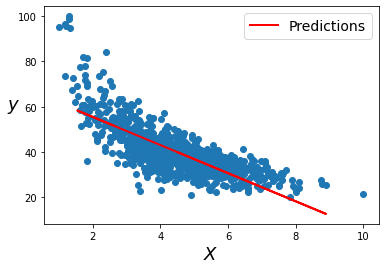

In [10]:
X_fit_RL = X_test
y_fit_RL = linear_reg.predict(X_fit_RL)

plt.scatter(X, y)
plt.plot(X_fit_RL, y_fit_RL, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [11]:
mae_RL = metrics.mean_absolute_error(y_test, y_fit_RL)
rmse_RL = np.sqrt(metrics.mean_squared_error(y_test, y_fit_RL))
r2s_RL = r2_score(y_test, y_fit_RL)

print('Error medio Absoluto (MAE): ', mae_RL)
print('Root Mean Squared Error: ', rmse_RL)
print('r2_score: ', r2s_RL)

Error medio Absoluto (MAE):  4.513943834797746
Root Mean Squared Error:  5.932738736518161
r2_score:  0.5695897011831419


In [12]:
residuo_RL = y_fit_RL - y_test

# Punto 3.

Regresión Polinomial.

* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [13]:
poly_features = PolynomialFeatures(degree=3, include_bias = False)
X_poly = poly_features.fit_transform(X_train)

In [14]:
lin_Poly = LinearRegression(fit_intercept = True)
lin_Poly.fit(X_poly, y_train)

LinearRegression()

In [15]:
lin_Poly.coef_, lin_Poly.intercept_

(array([-34.51814321,   5.05171512,  -0.26070502]), 114.03870684172352)

La ecuación del modelo de regresión polinomial es:

$\hat{y} = 114.0387 - 34.5181\,x + 5.0517\,x^2 - 0.2607\,x^3$

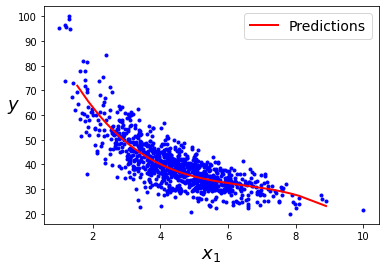

In [16]:
X_fit_RP = poly_features.fit_transform(X_test)
y_fit_RP = lin_Poly.predict(X_fit_RP)

order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_fit_RP[order]

plt.plot(X, y, "b.")
plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
#plt.axis([0, 10, 0, 100])

In [17]:
mae_RP = metrics.mean_absolute_error(y_test, y_fit_RP)
rmse_RP = np.sqrt(metrics.mean_squared_error(y_test, y_fit_RP))
r2s_RP = r2_score(y_test, y_fit_RL)

print('Error medio Absoluto (MAE): ', mae_RP)
print('Root Mean Squared Error: ', rmse_RP)
print('r2_score: ', r2s_RP)

Error medio Absoluto (MAE):  4.2826319819050385
Root Mean Squared Error:  5.682233156715733
r2_score:  0.5695897011831419


In [18]:
residuo_RP = y_fit_RP - y_test

# Punto 4. 

Realiza la regresión con Ridge.

* Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

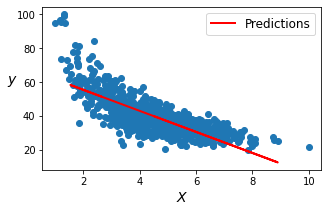

In [19]:
linear_Ridge = Ridge(alpha=5.0, fit_intercept=True)
linear_Ridge.fit(X_train, y_train)

X_fit_Ridge = X_test
y_fit_Ridge = linear_Ridge.predict(X_fit_Ridge)

plt.figure(figsize=(5, 3))
plt.scatter(X, y)
plt.plot(X_fit_Ridge, y_fit_Ridge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=12);

In [20]:
print("El valor de la pendiente es: ", linear_Ridge.coef_)
print("El valor de la ordenada al origen es: ", linear_Ridge.intercept_)

El valor de la pendiente es:  [-6.19691776]
El valor de la ordenada al origen es:  67.79389388826765


La ecuación del modelo de regresión lineal con penalización Ridge (L2) es:

$\hat{y} = -6.1969\,x + 67.7939$

In [21]:
mae_Ridge = metrics.mean_absolute_error(y_test, y_fit_Ridge)
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y_test, y_fit_Ridge))
r2s_Ridge = r2_score(y_test, y_fit_Ridge)

print('Error medio Absoluto (MAE): ', mae_Ridge)
print('Root Mean Squared Error: ', rmse_Ridge)
print('r2_score: ', r2s_Ridge)

Error medio Absoluto (MAE):  4.510020657963267
Root Mean Squared Error:  5.92680190097749
r2_score:  0.5704506852084535


In [22]:
residuo_Ridge = y_fit_Ridge - y_test

Realiza la regresión con Lasso.

* Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

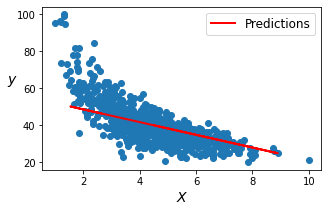

In [23]:
linear_Lasso = Lasso(alpha=5.0, fit_intercept=True)
linear_Lasso.fit(X_train, y_train)

X_fit_Lasso = X_test
y_fit_Lasso = linear_Lasso.predict(X_fit_Lasso)

plt.figure(figsize=(5, 3))
plt.scatter(X, y)
plt.plot(X_fit_Lasso, y_fit_Lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=12);

In [24]:
print("El valor de la pendiente es: ", linear_Lasso.coef_)
print("El valor de la ordenada al origen es: ", linear_Lasso.intercept_)

El valor de la pendiente es:  [-3.43141551]
El valor de la ordenada al origen es:  55.4665081021978


La ecuación del modelo de regresión lineal con penalización Lasso (L1) es:

$\hat{y} = -3.4314\,x + 55.4665$

In [25]:
mae_Lasso = metrics.mean_absolute_error(y_test, y_fit_Lasso)
rmse_Lasso = np.sqrt(metrics.mean_squared_error(y_test, y_fit_Lasso))
r2s_Lasso = r2_score(y_test, y_fit_Lasso)

print('Error medio Absoluto (MAE): ', mae_Lasso)
print('Root Mean Squared Error: ', rmse_Lasso)
print('r2_score: ', r2s_Lasso)

Error medio Absoluto (MAE):  4.694940127385808
Root Mean Squared Error:  6.288892674123298
r2_score:  0.5163618247995154


In [26]:
residuo_Lasso = y_fit_Lasso - y_test

# Punto 5.

Finalmente grafica:

* MAE (de los cuatro métodos).
* R2 (de los cuatro métodos).



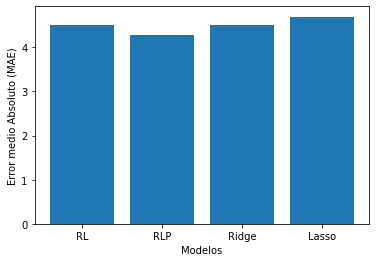

In [27]:
lista_MAE.append(mae_RL)
lista_MAE.append(mae_RP)
lista_MAE.append(mae_Ridge)
lista_MAE.append(mae_Lasso)

nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_MAE)
plt.xlabel('Modelos')
plt.ylabel("Error medio Absoluto (MAE)")
plt.show()

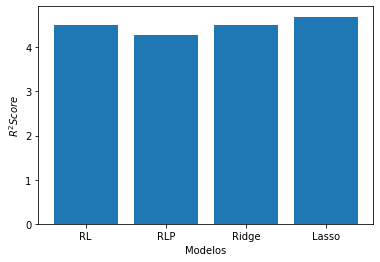

In [28]:
lista_R2S.append(mae_RL)
lista_R2S.append(mae_RP)
lista_R2S.append(mae_Ridge)
lista_R2S.append(mae_Lasso)

nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_R2S)
plt.xlabel('Modelos')
plt.ylabel("$R^2 Score$")
plt.show()

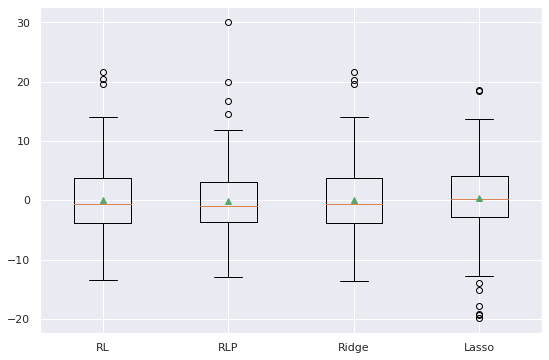

In [29]:
lista_Residuos.append(residuo_RL)
lista_Residuos.append(residuo_RP)
lista_Residuos.append(residuo_Ridge)
lista_Residuos.append(residuo_Lasso)

nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(lista_Residuos, labels=nombres, showmeans=True)
plt.show()

# Explica tus resultados.

¿Qué método se aproxima mejor, ¿por qué?, ¿Qué porcentajes de entrenamiento y evaluación usaste? ¿Qué error tienes?, ¿Es bueno?, ¿Cómo lo sabes?

Considero que el método que permite un mejor modelo es el de la regresión lineal polinomial, de hecho, para este ejercicio en particular desde el momento en que se grafican los datos reales podemos observar que tienen un comportamiento no lineal. Por lo tanto, un modelo tipo polinomial es el más adecuado ya que podemos utilizar el atributo (característica) para ajustar potencias mayores del mismo, añadirlas al modelo y poder describir varios tipos de curvtura en la relación entre la variable de entrada y salida.

Para este ejercicio se utilizó un porcentaje del 90% para el conjunto de entrenamiento y un porcentaje del 10% para el conjunto de prueba. 

Con respecto a la pregunta sobre los errores, para este ejercicio se nos pidió utilizar para evaluar el desempeño de los modelos estudiados, las siguientes métricas: MAE, RMSE y $R^2$. Podemos observar en la gráfica de barras para MAE que el modelo de regresión lineal polinomial presenta el menor valor para esta métrica, mientras que el modelo lineal con penalización Lasoos es el que mayor valor tiene para esta métrica. Con respecto a la métrica RMSE, de nueva cuenta el modelo de regresión lineal polinomial tiene el menor valor, alrededor de 5.008. 


También, se realizó un diagrama de caja-bigote de los residuos de cada modelos para poder comparar su desempeño. Podemos observar que todos los modelos cuentan con valores atípicos, mayormente en el modelo con penalización Lasso. Por otra parte, en el modelo polinomial podemos observar que los datos entre el primer cuartil y tercer cuartil se encuentran más compactos.

Esta actividad también nos sirvió para conocer sobre los métodos de regularización Ridge (L2) y Lasso (L1). Estos métodos nos ayudan a controlar el crecimiento (en magnitud) de los coeficientes de nuestro modelo, ya que si no lo hacemos se puede sobreentrenar nuestro modelo. 

En general, el método Ridge se penaliza a todos los pesos (coeficientes) del modelo de manera uniforme. Es decir, mientras mayor sea el valor de alguno de los coeficientes, mayoe es la penalización para todos. Por otra parte, el método Lasso nulifica aquells pesos (coeficientes) que no proporcionan información al momento de explicar la variable de salida. Penaliza de manera no uniforme a dichos pesos. 

# **Ejercicio 2. Regresión múltiple.**

Encuentra el mejor regresor para los datos de las casas.

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df2.drop('id', axis = 1, inplace = True)
df2.drop('date', axis = 1, inplace = True)
df2.drop('zipcode', axis = 1, inplace = True)
df2.drop('lat', axis = 1, inplace = True)
df2.drop('long', axis = 1, inplace = True)

In [ ]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


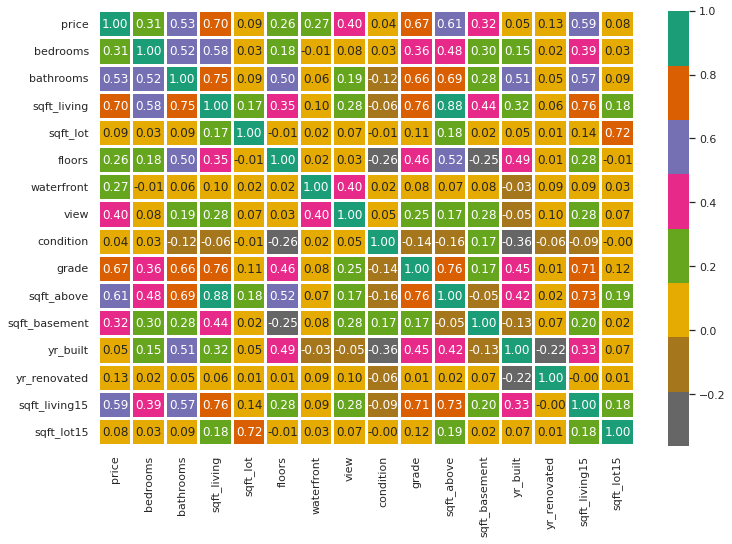

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df2.corr(), annot=True,  fmt=".2f", cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df2.columns.drop('price')

label = ['price']

X2 = df2[['sqft_living', 'grade', 'sqft_above']]
y2 = df2[label]

# Punto 1.

Divide los datos. 

* Utiliza la función train_test_split (ya esta en el notebook).

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1, random_state = 42)

print(f'Numero total de registros en la bdd: {len(X2)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X2_train)}')
print(f'Tamaño de X2_train: {X2_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X2_test)}')
print(f'Tamaño del X2_test: {X2_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X2_train: (19451, 3)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X2_test: (2162, 3)


In [ ]:
mae_lista = []
r2s_lista = []
residuos_lista = []

# Punto 2.
Regresión Múltiple Lineal.

* Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
model_RML = LinearRegression(fit_intercept=True)
model_RML.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
print("Valor del coeficiente para cada atributo: ", model_RML.coef_)
print("El valor de la ordenada al origen es: ", model_RML.intercept_)

Valor del coeficiente para cada atributo:  [[ 2.36220752e+02  1.08033855e+05 -7.77882902e+01]]
El valor de la ordenada al origen es:  [-639943.7892476]


In [ ]:
X_fit_modelRML = X2_test
y_fit_modelRML = model_RML.predict(X_fit_modelRML)

In [ ]:
mae_RML = metrics.mean_absolute_error(y2_test, y_fit_modelRML)
rmse_RML = np.sqrt(metrics.mean_squared_error(y2_test, y_fit_modelRML))
r2s_RML = r2_score(y2_test, y_fit_modelRML)

print('Error medio Absoluto (MAE): ', mae_RML)
print('Root Mean Squared Error: ', rmse_RML)
print('r2_score: ', r2s_RML)

Error medio Absoluto (MAE):  166933.39439002593
Root Mean Squared Error:  262421.70870862395
r2_score:  0.5272818186309952


In [ ]:
residuo_RML = y_fit_modelRML - y2_test

# Punto 3.

Regresión Múltiple Polinomial.

* Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
mul_poly_features = PolynomialFeatures(degree=3, include_bias = False)
X_mul_poly = mul_poly_features.fit_transform(X2_train)

In [ ]:
lin_mul_Poly = LinearRegression(fit_intercept = True)
lin_mul_Poly.fit(X_mul_poly, y2_train)

LinearRegression()

In [ ]:
lin_mul_Poly.coef_

array([[-1.54681570e+02,  1.84748461e+04, -4.30437421e+01,
        -3.27633835e-01,  1.19098253e+02,  5.29428267e-01,
        -1.73256203e+04, -3.98416177e+01, -2.38075908e-01,
         4.57571926e-05,  4.31124217e-02, -2.51642063e-04,
        -1.25655827e+01, -4.61244035e-02,  3.65524856e-04,
         1.94679312e+03,  6.93953535e+00,  6.53908488e-03,
        -1.56106728e-04]])

In [ ]:
lin_mul_Poly.intercept_

array([308604.53975997])

In [ ]:
X_fit_RMP = mul_poly_features.fit_transform(X2_test)
y_fit_RMP = lin_mul_Poly.predict(X_fit_RMP)

In [ ]:
mae_RMP = metrics.mean_absolute_error(y2_test, y_fit_RMP)
rmse_RMP = np.sqrt(metrics.mean_squared_error(y2_test, y_fit_RMP))
r2s_RMP = r2_score(y2_test, y_fit_RMP)

print('Error medio Absoluto (MAE): ', mae_RMP)
print('Root Mean Squared Error: ', rmse_RMP)
print('r2_score: ', r2s_RMP)

Error medio Absoluto (MAE):  154506.7512954816
Root Mean Squared Error:  240651.3882722909
r2_score:  0.6024611922034897


In [ ]:
residuo_RMP = y_fit_RMP - y2_test

# Punto 4.

Realiza la regresión con Ridge. 

* Incluye la ecuación de tu modelo, errores y r cuadrada.

In [ ]:
model_RidgeMul = Ridge(alpha=5.0, max_iter=100,  fit_intercept=True)
model_RidgeMul.fit(X2_train, y2_train)

Ridge(alpha=5.0, max_iter=100)

In [ ]:
print("El valor de la pendiente es: ", model_RidgeMul.coef_)
print("El valor de la ordenada al origen es: ", model_RidgeMul.intercept_)

El valor de la pendiente es:  [[ 2.36249416e+02  1.07981590e+05 -7.77601899e+01]]
El valor de la ordenada al origen es:  [-639653.52432425]


La ecuación del modelo de regresión polinomial con penalización Ridge (L2) es:

$\hat{y} = -639653.5243 + (2.3625e+02)\,x + (1.0798e+05)\,x^2 - (7.776e+01)\,x^3$

In [ ]:
X_fit_RidgeMul = X2_test
y_fit_RidgeMul = model_RidgeMul.predict(X_fit_RidgeMul)

In [ ]:
mae_RidgeMul = metrics.mean_absolute_error(y2_test, y_fit_RidgeMul)
rmse_RidgeMul = np.sqrt(metrics.mean_squared_error(y2_test, y_fit_RidgeMul))
r2s_RidgeMul = r2_score(y2_test, y_fit_RidgeMul)

print('Error medio Absoluto (MAE): ', mae_RidgeMul)
print('Root Mean Squared Error: ', rmse_RidgeMul)
print('r2_score: ', r2s_RidgeMul)

Error medio Absoluto (MAE):  166933.24426910334
Root Mean Squared Error:  262423.7824816791
r2_score:  0.5272743473428502


In [ ]:
residuo_RidgeMul = y_fit_RidgeMul - y2_test

Realiza la regresión con Lasso.

* Incluye la ecuación de tu modelo, errores y r cuadrada.

In [ ]:
modelLasso_Mul = Lasso(alpha=5.0, max_iter=100, fit_intercept=True)
modelLasso_Mul.fit(X2_train, y2_train)

Lasso(alpha=5.0, max_iter=100)

In [ ]:
print("El valor de la pendiente es: ", modelLasso_Mul.coef_)
print("El valor de la ordenada al origen es: ", modelLasso_Mul.intercept_)

El valor de la pendiente es:  [ 2.36225864e+02  1.08024440e+05 -7.77831713e+01]
El valor de la ordenada al origen es:  [-639891.49782467]


La ecuación del modelo de regresión polinomial con penalización Lasso (L1) es:

$\hat{y} = -639891.4978 + (2.3623e+02)\,x + (1.0802e+05)\,x^2 - (7.7783e+01)\,x^3$

In [ ]:
X_fit_LassoMul = X2_test
y_fit_LassoMul = modelLasso_Mul.predict(X_fit_LassoMul)

In [ ]:
mae_LassoMul = metrics.mean_absolute_error(y2_test, y_fit_LassoMul)
rmse_LassoMul = np.sqrt(metrics.mean_squared_error(y2_test, y_fit_LassoMul))
r2s_LassoMul = r2_score(y2_test, y_fit_LassoMul)

print('Error medio Absoluto (MAE): ', mae_LassoMul)
print('Root Mean Squared Error: ', rmse_LassoMul)
print('r2_score: ', r2s_LassoMul)

Error medio Absoluto (MAE):  166933.36643901851
Root Mean Squared Error:  262422.08155073243
r2_score:  0.527280475378034


In [ ]:
residuo_LassoMul = y_fit_LassoMul - y2_test

# Punto 5.

Finalmente grafica:

* MAE (de los cuatro métodos).
* R2 (de los cuatro métodos).

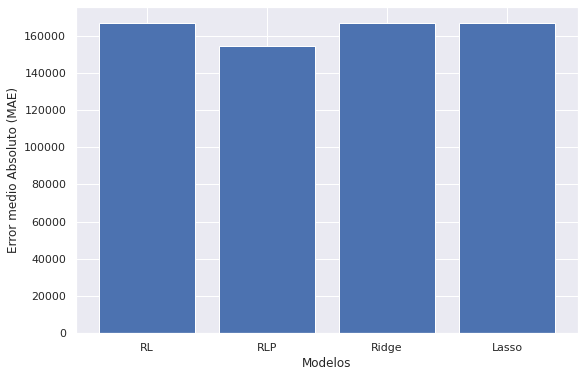

In [ ]:
mae_lista.append(mae_RML)
mae_lista.append(mae_RMP)
mae_lista.append(mae_RidgeMul)
mae_lista.append(mae_LassoMul)

nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, mae_lista)
plt.xlabel('Modelos')
plt.ylabel("Error medio Absoluto (MAE)")
plt.show()

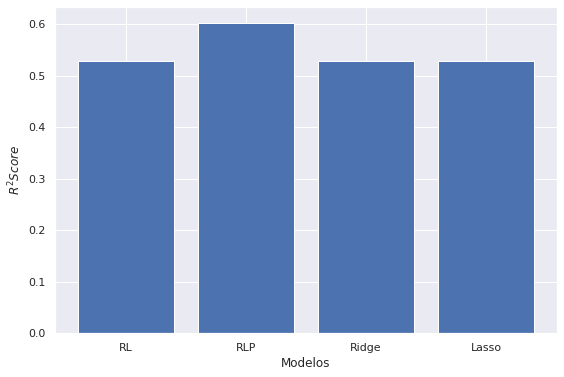

In [ ]:
r2s_lista.append(r2s_RML)
r2s_lista.append(r2s_RMP)
r2s_lista.append(r2s_RidgeMul)
r2s_lista.append(r2s_LassoMul)

nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, r2s_lista)
plt.xlabel('Modelos')
plt.ylabel("$R^2 Score$")
plt.show()